# Lecture 05의 데모

### Lecture 05의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec06.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec07.ipynb

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## **Census**

In [ ]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [ ]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')

In [ ]:
# Make things easier to read
# relabeled 한번 이상 사용 가능
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')

In [ ]:
us_pop.where('AGE',are.above_or_equal_to(80)).sort('AGE')

SEX,AGE,2014,2019
0,80,1263540,1475278
1,80,539342,643638
2,80,724198,831640
0,81,1215634,1381641
1,81,510456,593628
2,81,705178,788013
0,82,1152926,1241341
1,82,476098,525766
2,82,676828,715575
0,83,1089054,1151190


In [ ]:
us_pop.where('AGE',are.above_or_equal_to(99)).sort('AGE')

SEX,AGE,2014,2019
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199


## **Census (Recall)**

In [ ]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [ ]:
# 특정 열만 뽑아오기
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [ ]:
# relabeled는 특정 열의 label를 바꿔준다.
simple = partial.relabeled(2, '2014').relabeled(3, '2019')
simple

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


## **Line Plots**

In [ ]:
no_999 = simple.where('AGE', are.below(999))
no_999

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


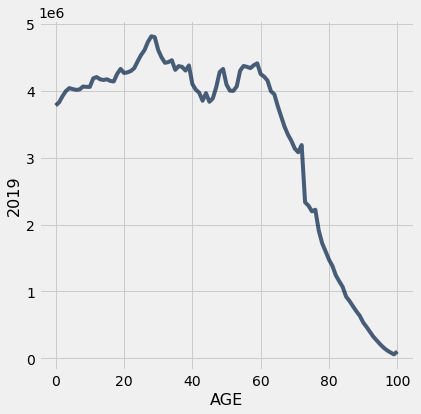

In [ ]:
overall = no_999.where('SEX', 0).drop('SEX')

# visualization
overall.plot('AGE', '2019') # x가 불연속 값들이라도 점들을 이어준다.

US Population


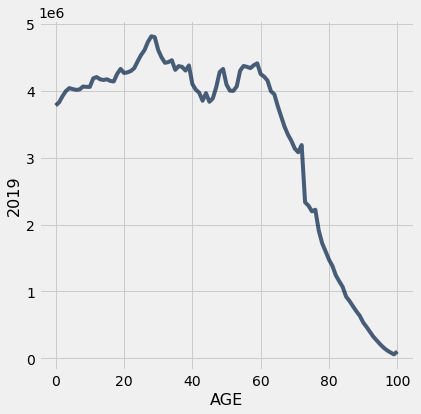

In [ ]:
overall.plot('AGE','2019')
print('US Population')

Text(0.5, 1.0, 'US Population')

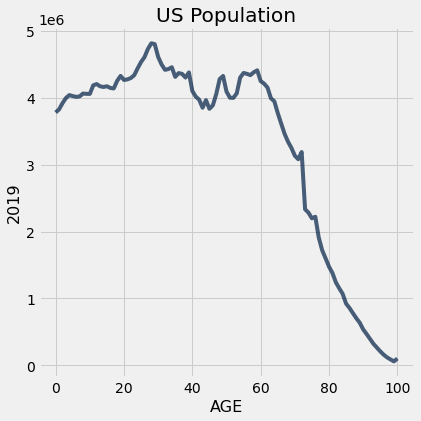

In [ ]:
# import mathplotlib.pyplot as plots
overall.plot('AGE', '2019')
plots.title('US Population')

## **Males vs Females**

In [ ]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [ ]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372
5,2061200,1967081
6,2052956,1964271
7,2055735,1966584
8,2079723,1986471
9,2073148,1988726


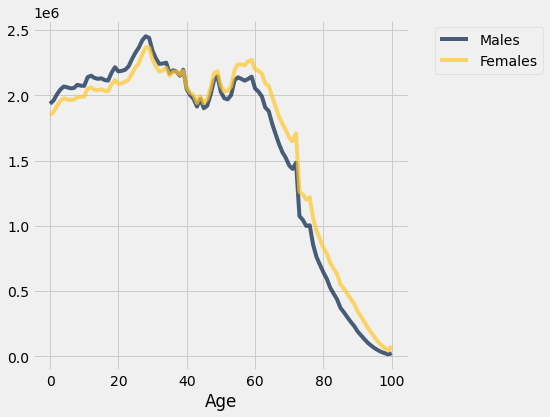

In [ ]:
# Age를 x축으로 하고 나머지 그래프를 그려준다.
# pop_2019.plot -> 먼저해보기
pop_2019.plot('Age') # 괄호 안에 label을 x축으로 취급하고 나머지를 y로 자동 취급

In [ ]:
# Calculate the percent female for each age
# males와 females에 해당하는 값들을 들고와서 더한다.
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

array([ 48.84772929,  48.85665575,  48.86482661,  48.90769794,
        48.87989409,  48.83177216,  48.89619133,  48.891796  ,
        48.85332574,  48.96079987,  48.98279709,  48.9638626 ,
        48.91584353,  48.91319525,  48.95759569,  48.99435008,
        49.0132324 ,  49.00202176,  48.95504446,  48.85543937,
        48.86882703,  48.87982978,  48.93202059,  48.82680386,
        48.75770556,  48.75912579,  48.69284051,  48.8521968 ,
        49.12023409,  49.23570746,  49.27026013,  49.32986637,
        49.3410954 ,  49.39558621,  49.56983336,  49.77550276,
        49.88230838,  49.98809984,  50.07964091,  49.90289454,
        50.14599374,  50.21453868,  50.37201166,  50.35627549,
        50.26558532,  50.48105622,  50.6527532 ,  50.58644103,
        50.62378332,  50.44245948,  50.55924807,  50.63152682,
        50.80644073,  50.81350976,  50.89171017,  51.13603295,
        51.27000222,  51.3678543 ,  51.52798838,  51.46621264,
        51.73196183,  51.88924675,  52.0955001 ,  52.30

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.848,  48.857,  48.865,  48.908,  48.88 ,  48.832,  48.896,
        48.892,  48.853,  48.961,  48.983,  48.964,  48.916,  48.913,
        48.958,  48.994,  49.013,  49.002,  48.955,  48.855,  48.869,
        48.88 ,  48.932,  48.827,  48.758,  48.759,  48.693,  48.852,
        49.12 ,  49.236,  49.27 ,  49.33 ,  49.341,  49.396,  49.57 ,
        49.776,  49.882,  49.988,  50.08 ,  49.903,  50.146,  50.215,
        50.372,  50.356,  50.266,  50.481,  50.653,  50.586,  50.624,
        50.442,  50.559,  50.632,  50.806,  50.814,  50.892,  51.136,
        51.27 ,  51.368,  51.528,  51.466,  51.732,  51.889,  52.096,
        52.307,  52.436,  52.752,  52.906,  53.012,  53.246,  53.251,
        53.387,  53.443,  53.519,  53.96 ,  54.261,  54.583,  54.837,
        55.269,  55.825,  56.165,  56.372,  57.035,  57.645,  58.29 ,
        59.117,  59.773,  60.625,  61.505,  62.424,  63.419,  64.354,
        65.55 ,  66.583,  67.762,  69.012,  70.064,  70.758,  72.12 ,
        72.672,  74.

In [ ]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

Age,Males,Females,Percent female
0,1935117,1847935,48.848
1,1958585,1871014,48.857
2,2005544,1916500,48.865
3,2043010,1955655,48.908
4,2066951,1976372,48.88
5,2061200,1967081,48.832
6,2052956,1964271,48.896
7,2055735,1966584,48.892
8,2079723,1986471,48.853
9,2073148,1988726,48.961


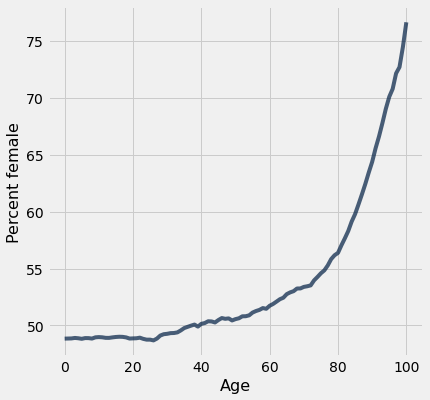

In [ ]:
pop_2019.plot('Age', 'Percent female')

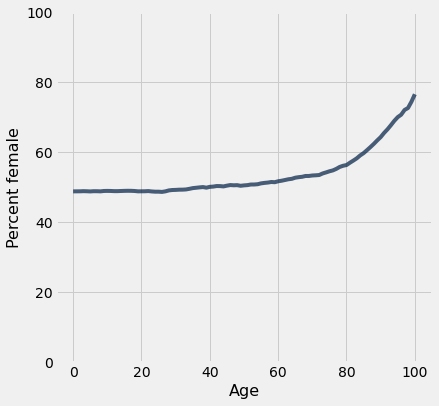

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
# y축에 한계를 둠으로써 그래프의 왜곡을 줄여준다.
# mathlib.pyplot 안에 있는 ylim이라는 것은 y축의 범위를 제한한다.

pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # 0에서 100까지의 데이터로 제한

## **Scatter Plots**

In [ ]:
# Actors and their highest grossing movies
# 배우의 이름과 수익에 대한 정보를 기록
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


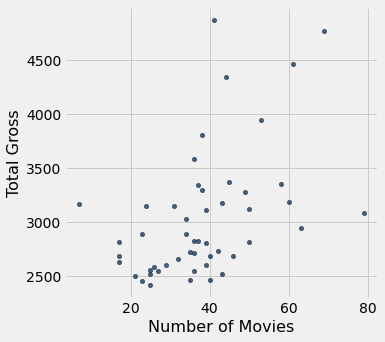

In [ ]:
# 두개의 데이터간의 관계를 점으로 보여준다.
actors.scatter('Number of Movies', 'Total Gross')

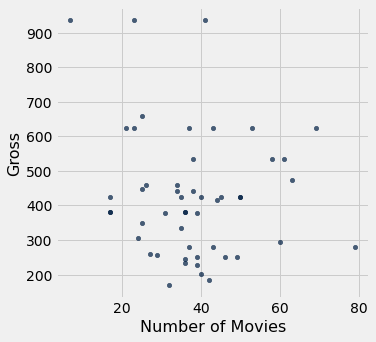

In [ ]:
# 이렇게 두 변수간의 관계로 많은 것을 파악할 수 있다.
actors.scatter('Number of Movies', 'Gross')

In [ ]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
